# Contents

### Step 1. Data Preprocessing
#### 1. Import Packages 
#### 2. Load Data
$\;\;\;\;\;\;\;\;\;\;\;\;$2.1. Create label and binarized matrix for the entire dataset
<br>$\;\;\;\;\;\;\;\;\;\;\;\;$2-2. Create second label for each continents
#### 3. Visualization of Data we get
$\;\;\;\;\;\;\;\;\;\;\;\;$3-1. Visualization of the number of recipes (Country level)
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$3-1. Visualization of the number of recipes (Continent level)
<br>
### Step 2. Data Processing
#### 1. Function call
#### 2. Data Analysis Sequence 
$\;\;\;\;\;\;\;\;\;\;\;\;$2-1. Perceptron
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Continent level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Country level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$1. America
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$2. Asia
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$3. Europe
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$2-2. Logistic Regression
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Continent level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Country level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$1. America
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$2. Asia
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$3. Europe
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$2-3. Soft Linear SVM Classifier
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Continent level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Country level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$1. America
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$2. Asia
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$3. Europe
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$2-4. ANN
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Continent level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$@ Country level classification
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$1. America
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$2. Asia
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$3. Europe
<br>
### Step 3. Evaluation of the Model
#### 1. ROC Curves
$\;\;\;\;\;\;\;\;\;\;\;\;$1-1. Function for ROC curves
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$1-2. Continent Level ROC Curves
<br> $\;\;\;\;\;\;\;\;\;\;\;\;$1-3. Country Level ROC Curves
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$1. America
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$2. Asia
<br> $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$3. Europe
<br>
### Step 4. Data Analysis
##### 1. Does the Best Model in Continent Level + Best Model in Country Level lead to Best Model overall?
##### 2. Make the Confusion Matrix for the Entire DataSet
<br>

### Step 5. Discussion
##### 1. Interpretation of the Confusion Matrix and derive the meaning of the data to the culturual relationship
### Reference

# Step 1. Data Preprocessing

# 1. Import Packages 

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

import pickle
import matplotlib.pyplot as plt
import pylab as plt_cm
import itertools

# 2. Load Data

## 2-1. Create label and binarized matrix for the entire dataset

In [2]:
data=pd.read_json('train.json')  ### Load data into a pandas dataframe

In [3]:
unique_ingredients=[] ### Initialize the list for all ingredients 
for i in range(len(data.id)):
    for k in data.ingredients[i]:
        if k not in unique_ingredients:
            unique_ingredients.append(k) ## Append the ingredient if it is not in the unique_ingredients

In [4]:
N = len(unique_ingredients)
M = len(data.id)
binary_assignment=[] ## Initialize the binary_assignment as a list
for i in range(M):
    assigment=np.zeros(N) ### initialze the ingredients as all 0
    for j in data.ingredients[i]:
        assigment[unique_ingredients.index(j)]=1 ### Assigne 1 if the ingreident is in the dish
    binary_assignment.append(assigment)

In [5]:
binary_assignment=np.reshape(binary_assignment,(M,N)) ## Reshape the assignemt into M by N matrix 

In [6]:
from sklearn import preprocessing
unique_labels=np.unique(data.cuisine)
le = preprocessing.LabelEncoder()
le.fit(data.cuisine)
labels=le.transform(data.cuisine)
label=np.array(labels)

## 2-2. Create second label for each continents

In [7]:
America=['cajun_creole','southern_us','jamaican','mexican','brazilian']
Asia=['chinese','filipino','thai','vietnamese','japanese','korean','indian']
EU=['french','greek','italian','russian','spanish','irish','british']
Africa=['moroccan']

In [8]:
labels2=[]
for i in data.cuisine:
    if i in America:
        labels2.append(0)
    elif i in Asia:
        labels2.append(1)
    elif i in EU:
        labels2.append(2)
    else:
        labels2.append(3)


In [9]:
label2=np.array(labels2)
America_ind=np.where(label2==0)[0]
Asia_ind=np.where(label2==1)[0]
EU_ind=np.where(label2==2)[0]
Africa_ind=np.where(label2==3)[0]

In [10]:
America_X=binary_assignment[America_ind,:]
America_y=label[America_ind]-min(label[America_ind])
Asia_X=binary_assignment[Asia_ind,:]
Asia_y=label[Asia_ind]-min(label[Asia_ind])
EU_X=binary_assignment[EU_ind,:]
EU_y=label[EU_ind]-min(label[EU_ind])
Africa_X=binary_assignment[Africa_ind,:]
Africa_y=label[Africa_ind]-min(label[Africa_ind])


In [11]:
Adjustments=[min(label[America_ind]),min(label[Asia_ind]),min(label[EU_ind]),min(label[Africa_ind])]
print(Adjustments)

[0, 3, 1, 14]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, labels2, test_size=0.2, random_state=0)

In [13]:
Ac_am_train=[]
Ac_am_test=[]
Ac_as_train=[]
Ac_as_test=[]
Ac_eu_train=[]
Ac_eu_test=[]

In [14]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(binary_assignment, label, test_size=0.2, random_state=0)

# 3. Visualization of Data we get

## 3-1. Visualization of the number of recipes (Country level)

In [15]:
count=[]
for i in unique_labels:
    count.append(len(np.where(data.cuisine==i)[0]))

In [16]:
countries=['Brazil','United Kingdom','United States of America','China','Philippines','France','Greece','India','Ireland','Italy','Jamaica','Japan','South Korea','Mexico','Morocco','Russia','United States of America','Spain','Thailand','Vietnam']

In [17]:
import geopandas as gpd
shapefile = 'ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [18]:
countries, count #cajun_creole, southern_us
unwanted_num = {821, 1546, 4320}
count2 = [ele for ele in count if ele not in unwanted_num]
count2.append(5866)
print("New list after removing United States #: ", count2)

unwanted_country = {'United States of America', 'Morocco'}
countries2 = [ele for ele in countries if ele not in unwanted_country]
countries2.append('United States of America')
print("New list after removing United States label: ", countries2)

count_all=np.zeros((177))
for i in range(len(countries2)):
    count_all[np.where(gdf['country']==countries2[i])[0]]=count2[i]
    
count_all_df=pd.DataFrame({'count':count_all})
gdf2=gdf.join(count_all_df)
gdf2.loc[gdf2['count'] == 0, 'count'] = np.nan
gdf2.loc[gdf2['country']=='Morocco', 'count'] = 821
gdf2.fillna('No data', inplace = True)



New list after removing United States #:  [467, 804, 2673, 755, 2646, 1175, 3003, 667, 7838, 526, 1423, 830, 6438, 489, 989, 1539, 825, 5866]
New list after removing United States label:  ['Brazil', 'United Kingdom', 'China', 'Philippines', 'France', 'Greece', 'India', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'South Korea', 'Mexico', 'Russia', 'Spain', 'Thailand', 'Vietnam', 'United States of America']


In [19]:
import json
merged_json = json.loads(gdf2.to_json())
json_data = json.dumps(merged_json)

In [20]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource,LinearColorMapper, LogColorMapper, BasicTicker, ContinuousColorMapper, ColorBar, Circle, PanTool, WheelZoomTool, BoxSelectTool
from bokeh.palettes import brewer
from bokeh.palettes import Viridis256, Viridis3
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column

from math import pi
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure, output_file, save
from bokeh.transform import cumsum
from bokeh.io import export_png

In [21]:
# Reference http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
# https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

geosource = GeoJSONDataSource(geojson = json_data)

hover = HoverTool(tooltips = [ ('Country/region','@country'),('Recipes', '@count')])


p_geo_country = figure(title = 'The number of recipe according to the country', plot_height = 600 , plot_width = 950,toolbar_location = None, tools = [hover])
p_geo_country.xgrid.grid_line_color = None
p_geo_country.ygrid.grid_line_color = None




color_mapper = LinearColorMapper(palette = Viridis256, low = 400, high = 4800, nan_color = '#d9d9d9')
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(), label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal') 
p_geo_country.add_layout(color_bar, 'below')


p_geo_country.patches('xs','ys', source = geosource,fill_color = {'field' :'count', 'transform' : color_mapper},
          line_color = None, line_width = 0.25, fill_alpha = 1)
p_geo_country.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())

output_notebook()
show(p_geo_country)
output_file("GeoChart(Country).html")
save(p_geo_country)

Loading BokehJS ...

'C:\\Users\\User\\Documents\\CX4240\\CRproject\\project\\GeoChart(Country).html'

In [22]:
output_file("pie.html")

In [23]:
x = {
    'Brazil' : 467,
    'United Kingdom': 804,
    'China': 2673,
    'Philippines': 755,
    'France': 2646,
    'Greece': 1175,
    'India': 3003,
    'Ireland': 667,
    'Italy': 7838,
    'Jamaica': 526,
    'Japan': 1423,
    'South Korea': 830,
    'Mexico': 6438,
    'Russia': 489,
    'Spain': 989,
    'Thailand': 1539,
    'Vietnam': 825,
    'United States of America': 5866,
    'Morocco': 821
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p_country_pi = figure(plot_height=350, title="The number of recipes according to the country", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p_country_pi.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p_country_pi.axis.axis_label=None
p_country_pi.axis.visible=False
p_country_pi.grid.grid_line_color = None

show(p_country_pi)
output_file("PieChart(Country).html")
save(p_country_pi)

'C:\\Users\\User\\Documents\\CX4240\\CRproject\\project\\PieChart(Country).html'

## 3-2. Visualization of the number of recipes (Continent level)

In [24]:
Am = ['United States of America', 'Jamaica', 'Mexico', 'Brazil'] # 13297
As = ['China', 'Philippines', 'Thailand', 'Vietnam', 'Japan', 'South Korea', 'India'] # 11048
Europe = ['France', 'Greece', 'Italy', 'Russia', 'Spain', 'Ireland', 'United Kingdom'] # 14608
#821
gdf3 = gdf2

# Incorporate Continent Level
# America

gdf3.loc[gdf3['country'] == 'United States of America', 'count'] = 13297
gdf3.loc[gdf3['country'] == 'Jamaica', 'count'] = 13297
gdf3.loc[gdf3['country'] == 'Mexico', 'count'] = 13297
gdf3.loc[gdf3['country'] == 'Brazil', 'count'] = 13297
gdf3.loc[gdf3['country'] == 'United States of America', 'country'] = 'United States of America (America)'
gdf3.loc[gdf3['country'] == 'Jamaica', 'country'] = 'Jamaica (America)'
gdf3.loc[gdf3['country'] == 'Mexico', 'country'] = 'Mexico (America)'
gdf3.loc[gdf3['country'] == 'Brazil', 'country'] = 'Brazil (America)'

# Asia
gdf3.loc[gdf3['country'] == 'China', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'Philippines', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'Thailand', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'Philippines', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'Vietnam', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'Japan', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'South Korea', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'India', 'count'] = 11048
gdf3.loc[gdf3['country'] == 'China', 'country'] = 'China (Asia)'
gdf3.loc[gdf3['country'] == 'Philippines', 'country'] = 'Philippines (Asia)'
gdf3.loc[gdf3['country'] == 'Thailand', 'country'] = 'Thailand (Asia)'
gdf3.loc[gdf3['country'] == 'Philippines', 'country'] = 'Philippines (Asia)'
gdf3.loc[gdf3['country'] == 'Vietnam', 'country'] = 'Vietnam (Asia)'
gdf3.loc[gdf3['country'] == 'Japan', 'country'] = 'Japan (Asia)'
gdf3.loc[gdf3['country'] == 'South Korea', 'country'] = 'South Korea (Asia)'
gdf3.loc[gdf3['country'] == 'India', 'country'] = 'India (Asia)'

# Europe
gdf3.loc[gdf3['country'] == 'France', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'Greece', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'Italy', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'Russia', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'Spain', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'Ireland', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'United Kingdom', 'count'] = 14608
gdf3.loc[gdf3['country'] == 'France', 'country'] = 'France (Europe)'
gdf3.loc[gdf3['country'] == 'Greece', 'country'] = 'Greece (Europe)'
gdf3.loc[gdf3['country'] == 'Italy', 'country'] = 'Italy (Europe)'
gdf3.loc[gdf3['country'] == 'Russia', 'country'] = 'Russia (Europe)'
gdf3.loc[gdf3['country'] == 'Spain', 'country'] = 'Spain (Europe)'
gdf3.loc[gdf3['country'] == 'Ireland', 'country'] = 'Ireland (Europe)'
gdf3.loc[gdf3['country'] == 'United Kingdom', 'country'] = 'United Kingdom (Europe)'

#Africa
gdf3.loc[gdf3['country'] == 'Morocco', 'country'] = 'Morocco (Africa)'




In [25]:
merged_json2 = json.loads(gdf3.to_json())
#Convert to String like object.
json_data2 = json.dumps(merged_json2)
np.unique(countries)

array(['Brazil', 'China', 'France', 'Greece', 'India', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Mexico', 'Morocco', 'Philippines', 'Russia',
       'South Korea', 'Spain', 'Thailand', 'United Kingdom',
       'United States of America', 'Vietnam'], dtype='<U24')

In [26]:
geosource = GeoJSONDataSource(geojson = json_data2)

hover = HoverTool(tooltips = [ ('Country/region','@country'),('Recipes', '@count')])
p_geo_continent = figure(title = 'The number of recipe according to the country', plot_height = 600 , plot_width = 950,toolbar_location = None, tools = [hover])
p_geo_continent.xgrid.grid_line_color = None
p_geo_continent.ygrid.grid_line_color = None

color_mapper = LinearColorMapper(palette = Viridis256, low = 800, high = 12000, nan_color = '#d9d9d9')
color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(), label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal') 
p_geo_continent.add_layout(color_bar, 'below')


p_geo_continent.patches('xs','ys', source = geosource,fill_color = {'field' :'count', 'transform' : color_mapper},
          line_color = None, line_width = 0.25, fill_alpha = 1)
p_geo_continent.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())

output_notebook()
show(p_geo_continent)
output_file("GeoChart(Continent).html")
save(p_geo_continent)

Loading BokehJS ...

'C:\\Users\\User\\Documents\\CX4240\\CRproject\\project\\GeoChart(Continent).html'

In [27]:
x = {
    'America': 13297,
    'Asia': 11048,
    'Europe': 14608,
    'Africa': 821
}
data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(x)]

p_continent_pi = figure(plot_height=350, title="The number of recipes according to the continent", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p_continent_pi.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend='country', source=data)

p_continent_pi.axis.axis_label=None
p_continent_pi.axis.visible=False
p_continent_pi.grid.grid_line_color = None

show(p_continent_pi)
output_file("PieChart(Continent).html")
save(p_continent_pi)

'C:\\Users\\User\\Documents\\CX4240\\CRproject\\project\\PieChart(Continent).html'

## Dendrogram

In [28]:
Continent_Level = { 
"name": "Taco",
 "children": [
  {
   "name": "America",
   "children": [
      {"name": "cajun_creole", "value": 3938},
      {"name": "southern_us", "value": 3812},
      {"name": "jamaican", "value": 6714},
      {"name": "mexican", "value": 743},
      {"name": "brazilian", "value": 743}
   ]
  },
  {
   "name": "Asia",
   "children": [
      {"name": "chinese", "value": 3938},
      {"name": "filipino", "value": 3812},
      {"name": "thai", "value": 6714},
      {"name": "vietnamese", "value": 743},
      {"name": "japanese", "value": 743},
      {"name": "korean", "value": 743},
      {"name": "indian", "value": 743}
   ]
  },
  {
   "name": "Europe",
   "children": [
      {"name": "french", "value": 3938},
      {"name": "greek", "value": 3812},
      {"name": "italian", "value": 6714},
      {"name": "russian", "value": 743},
      {"name": "spanish", "value": 743},
      {"name": "irish", "value": 743},
      {"name": "british", "value": 743}
   ]
  },
  {
   "name": "Africa",
   "children": [
      {"name": "moroccan", "value": 3938}
   ]  
  }
 ]
}


In [29]:
Country_Level = { 
"name": "Taco",
 "children": [
      {"name": "cajun_creole", "value": 3938},
      {"name": "southern_us", "value": 3812},
      {"name": "jamaican", "value": 6714},
      {"name": "mexican", "value": 743},
      {"name": "brazilian", "value": 743},
      {"name": "chinese", "value": 3938},
      {"name": "filipino", "value": 3812},
      {"name": "thai", "value": 6714},
      {"name": "vietnamese", "value": 743},
      {"name": "japanese", "value": 743},
      {"name": "korean", "value": 743},
      {"name": "indian", "value": 743},
      {"name": "french", "value": 3938},
      {"name": "greek", "value": 3812},
      {"name": "italian", "value": 6714},
      {"name": "russian", "value": 743},
      {"name": "spanish", "value": 743},
      {"name": "irish", "value": 743},
      {"name": "british", "value": 743},
      {"name": "moroccan", "value": 3938}
   ]  
}

In [30]:
from IPython.display import HTML, display, Javascript
import json
from IPython.core.display import display, HTML
from string import Template
from IPython.display import IFrame
json.dump(Continent_Level, open("Continent_Level.json", "w"), sort_keys=True, indent=4)
json.dump(Country_Level, open("Country_Level.json", "w"), sort_keys=True, indent=4)

In [31]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v5.min'
    }
});

<IPython.core.display.Javascript object>

In [35]:
IFrame(src='https://nbviewer.jupyter.org/github/Youngjo-Kim/Geographic-Classification-of-Cuisine-Recipes/blob/master/Countryhtml_For_Country.html', width=1000, height=1000)

In [33]:
IFrame(src='Continentlevel.html', width=1000, height=1000)

# Step 2. Data Processing

# 1. Function call

Function for confusion matrix

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt_cm.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt_cm.figure(figsize=(12,12))
    plt_cm.rcParams.update({'font.size': 10})

    plt_cm.imshow(cm, interpolation='nearest', cmap=cmap)
    plt_cm.title(title)
    plt_cm.colorbar()
    tick_marks = np.arange(len(classes))
    plt_cm.xticks(tick_marks, classes, rotation=90)
    plt_cm.yticks(tick_marks, classes, rotation=0)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt_cm.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt_cm.tight_layout()
    plt_cm.ylabel('True label')
    plt_cm.xlabel('Predicted label')
    plt_cm.savefig(savename,dpi=900)
    
def correct_fraction(mat_test, FoodLabel):
    fraction = []
    n_row = np.sum(mat_test, axis=1)
    for i in range(0,mat_test.shape[0]):
        actual_label = FoodLabel[i]
        correct = mat_test[i,i]
        per_correct = correct/n_row[i]
        fraction.append(per_correct)
        print("Food index:", actual_label, "correct:", per_correct)
    return fraction

def all_result(y_actual, y_pred, truelabel, normalize = True, title='Confusion matrix'):
    cm = confusion_matrix(y_actual, y_pred)
    plt_cm.figure()
    plot_confusion_matrix(cm, classes=truelabel, normalize=normalize, title = title)
    plt_cm.show() 
    
    accuracy = correct_fraction(cm, truelabel)
    avg_accuracy = np.mean(accuracy)
    return accuracy, avg_accuracy

FoodLabel = np.arange(20)
FoodLabel2 = np.arange(4)

# 2. Data Analysis sequence

 We used 4 techniques (Perceptron, Logistic Regression, Soft SVM, and ANN) for two classifications (continent level, country level). Therefore, total 12 simulations are tested (Continent Level (4) + Country Level (12 = America (4) + Asia (4) + Europe (4)). We do not apply our techniques on the country level for Africa since Africa only has one country in our system.

# 2-1. Perceptron

## @ Continent level Classification

In [26]:
clf_perceptron = Perceptron(tol=0.00001,random_state=0)
label3=np.ones(len(labels))
label3[America_ind]=-1
# took 37.7s (See Just_Practice Jupyter file)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(binary_assignment, label2, test_size=0.2, random_state=0)
clf_perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-05,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
pcp_cont_score=clf_perceptron.decision_function(X_test)

In [30]:
y_pcp_test_pred=clf_perceptron.predict(X_test)
y_pcp_train_pred=clf_perceptron.predict(X_train)
accuracy_pcp_test = np.sum(y_pcp_test_pred == y_test) / len(y_test)
accuracy_pcp_train = np.sum(y_pcp_train_pred == y_train) / len(y_train)
print('\tAccuracy of test', accuracy_pcp_test)
print('\tAccuracy of training',accuracy_pcp_train)

	Accuracy of test 0.8829666876178504
	Accuracy of training 0.9515383890128539


In [31]:
cm_all_pcp = confusion_matrix(y_test, y_pcp_test_pred)
print(cm_all_pcp/cm_all_pcp.sum(axis=0))

[[0.85766423 0.03832442 0.08034127 0.03797468]
 [0.03029197 0.92023173 0.02523996 0.05696203]
 [0.10510949 0.03565062 0.88801991 0.20253165]
 [0.00693431 0.00579323 0.00639886 0.70253165]]


## @ Country level Classification

## [1] America

In [32]:
X_train_am, X_test_am, y_train_am, y_test_am = train_test_split(America_X, America_y, test_size=0.2, random_state=0)
clf_pcp_Am=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_Am.fit(X_train_am,y_train_am)

Wall time: 14.7 s


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-05,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
y_test_pred_am=clf_pcp_Am.predict(X_test_am)
y_train_pred_am=clf_pcp_Am.predict(X_train_am)
accuracy_test_am = np.sum(y_test_pred_am == y_test_am) / len(y_test_am)
accuracy_train_am = np.sum(y_train_pred_am == y_train_am) / len(y_train_am)
print('\tAccuracy of test', accuracy_test_am)
print('\tAccuracy of training',accuracy_train_am)

	Accuracy of test 0.8597744360902255
	Accuracy of training 0.9754630064867914


In [175]:
cm_am = confusion_matrix(y_test_am, y_test_pred_am)
print((cm_am/cm_am.sum(axis=1)))
print(America)
print(cm_am)

[[0.77083333 0.00666667 0.02040816 0.00932401 0.00682594]
 [0.0625     0.66666667 0.05102041 0.01631702 0.07736064]
 [0.03125    0.01666667 0.74489796 0.00621601 0.01023891]
 [0.21875    0.04333333 0.06122449 0.93162393 0.05460751]
 [0.26041667 0.15666667 0.14285714 0.04040404 0.84300341]]
['cajun_creole', 'southern_us', 'jamaican', 'mexican', 'brazilian']
[[  74    2    2   12    6]
 [   6  200    5   21   68]
 [   3    5   73    8    9]
 [  21   13    6 1199   48]
 [  25   47   14   52  741]]


## [2] Asia

In [35]:
X_train_as, X_test_as, y_train_as, y_test_as= train_test_split(Asia_X, Asia_y, test_size=0.2, random_state=0,shuffle=True)
clf_pcp_as=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_as.fit(X_train_as,y_train_as)

Wall time: 18.1 s


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-05,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
y_test_pred_as=clf_pcp_as.predict(X_test_as)
y_train_pred_as=clf_pcp_as.predict(X_train_as)
accuracy_test_as = np.sum(y_test_pred_as == y_test_as) / len(y_test_as)
accuracy_train_as = np.sum(y_train_pred_as == y_train_as) / len(y_train_as)
print('\tAccuracy of test', accuracy_test_as)
print('\tAccuracy of training',accuracy_train_as)
cm_pcp_as = confusion_matrix(y_test_as, y_test_pred_as)

	Accuracy of test 0.7846153846153846
	Accuracy of training 0.9566644037112468


## [3] Europe

In [37]:
X_train_eu, X_test_eu, y_train_eu, y_test_eu= train_test_split(EU_X, EU_y, test_size=0.2, random_state=0,shuffle=True)

In [38]:

clf_pcp_eu=Perceptron(tol=0.00001,random_state=0)
%time clf_pcp_eu.fit(X_train_eu,y_train_eu)

Wall time: 20.7 s


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-05,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
y_test_pred_eu=clf_pcp_eu.predict(X_test_eu)
y_train_pred_eu=clf_pcp_eu.predict(X_train_eu)
accuracy_test_eu = np.sum(y_test_pred_eu == y_test_eu) / len(y_test_eu)
accuracy_train_eu = np.sum(y_train_pred_eu == y_train_eu) / len(y_train_eu)
print('\tAccuracy of test', accuracy_test_eu)
print('\tAccuracy of training',accuracy_train_eu)
cm_eu = confusion_matrix(y_test_eu, y_test_pred_eu)
print(cm_eu)

	Accuracy of test 0.7354551676933607
	Accuracy of training 0.9276912544925552
[[  92   23    2   15   20    7    6]
 [  25  317    5   14  139   12   26]
 [   1    8  185    1   36    5   12]
 [  24   15    3   56   18    6    2]
 [  22   79   41   15 1338    9   35]
 [   3   12    6   10   15   46    5]
 [   3   24   13    2   47    7  115]]


In [40]:
accuracy_cont_train=[accuracy_pcp_train]
accuracy_cont_test=[accuracy_pcp_test]

In [41]:
Ac_am_train.append(accuracy_train_am)
Ac_am_test.append(accuracy_test_am)
Ac_as_train.append(accuracy_train_as)
Ac_as_test.append(accuracy_test_as)
Ac_eu_train.append(accuracy_train_eu)
Ac_eu_test.append(accuracy_test_eu)

In [90]:
pickle.dump(clf_perceptron, open('pcp_cont_new', 'wb'))
pickle.dump(clf_pcp_Am, open('pcp_am_new', 'wb'))
pickle.dump(clf_pcp_as, open('pcp_as_new', 'wb'))
pickle.dump(clf_pcp_eu, open('pcp_eu_new', 'wb'))

# 2-2. Logistic Regression

## @ Continent level Classification

In [45]:
Cs = [1,2,3,5]
clf = LogisticRegressionCV(Cs,cv=5, random_state=0,max_iter=300,multi_class='ovr')
%time clf.fit(X_train, y_train)

Wall time: 20min 59s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=300,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [46]:
Cs = [1,2,3,5]
clf_cw = LogisticRegressionCV(Cs,cv=5, random_state=0,max_iter=300,multi_class='ovr',class_weight='balanced')
%time clf_cw.fit(X_train, y_train)

Wall time: 21min 12s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight='balanced', cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=300, multi_class='ovr', n_jobs=None, penalty='l2',
           random_state=0, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [47]:
y_test_pred=clf.predict(X_test)
y_train_pred=clf.predict(X_train)
accuracy_lr_test = np.sum(y_test_pred == y_test) / len(y_test)
accuracy_lr_train = np.sum(y_train_pred == y_train) / len(y_train)

In [48]:
y_test_pred_wb=clf_cw.predict(X_test)
y_train_pred_wb=clf_cw.predict(X_train)
accuracy_lr_test_wb = np.sum(y_test_pred_wb == y_test) / len(y_test)
accuracy_lr_train_wb = np.sum(y_train_pred_wb == y_train) / len(y_train)

In [49]:
accuracy_cont_train.append(accuracy_lr_train)
accuracy_cont_test.append(accuracy_lr_test)

In [50]:
print('\tAccuracy of test', accuracy_lr_test)
print('\tAccuracy of training',accuracy_lr_train)
print('\tAccuracy of test', accuracy_lr_test_wb)
print('\tAccuracy of training',accuracy_lr_train_wb)

	Accuracy of test 0.9054682589566311
	Accuracy of training 0.9465413746503661
	Accuracy of test 0.8988057825267127
	Accuracy of training 0.9474842075489487


In [178]:
cm_cont_log = confusion_matrix(y_test, y_test_pred)
print(cm_cont_log/cm_cont_log.sum(axis=0))
print(cm_cont_log)

cm_wb=confusion_matrix(y_test, y_test_pred_wb)

[[0.90384615 0.03088102 0.08280888 0.        ]
 [0.02269231 0.94550409 0.02649884 0.05223881]
 [0.07038462 0.01861944 0.88075522 0.1119403 ]
 [0.00307692 0.00499546 0.00993707 0.8358209 ]]
[[2350   68  250    0]
 [  59 2082   80    7]
 [ 183   41 2659   15]
 [   8   11   30  112]]


In [92]:
pickle.dump(clf, open('log_cont_new', 'wb'))

## @ Country level Classification

## [1] America

In [52]:
clf_lr_am = LogisticRegressionCV(Cs,cv=5, random_state=0,max_iter=300,multi_class='ovr')
%time clf_lr_am.fit(X_train_am, y_train_am)

Wall time: 5min 24s


LogisticRegressionCV(Cs=[1, 2, 3, 5], class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=300,
           multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [53]:
y_test_predlr_am=clf_lr_am.predict(X_test_am)
y_train_predlr_am=clf_lr_am.predict(X_train_am)
accuracy_test_lr_am = np.sum(y_test_predlr_am == y_test_am) / len(y_test_am)
accuracy_train_lr_am = np.sum(y_train_predlr_am == y_train_am) / len(y_train_am)

In [54]:
print('\tAccuracy of test', accuracy_test_lr_am)
print('\tAccuracy of training',accuracy_train_lr_am)

	Accuracy of test 0.8823308270676692
	Accuracy of training 0.9569427470151358


## [2] Asia

In [55]:
clf_lr_as = LogisticRegressionCV(Cs,cv=5, random_state=0,max_iter=300,multi_class='ovr')
%time clf_lr_as.fit(X_train_as, y_train_as)
y_test_predlr_as=clf_lr_as.predict(X_test_as)
y_train_predlr_as=clf_lr_as.predict(X_train_as)
accuracy_test_lr_as = np.sum(y_test_predlr_as == y_test_as) / len(y_test_as)
accuracy_train_lr_as = np.sum(y_train_predlr_as == y_train_as) / len(y_train_as)

Wall time: 6min 20s


In [56]:
print('\tAccuracy of test', accuracy_test_lr_as)
print('\tAccuracy of training',accuracy_train_lr_as)

	Accuracy of test 0.820814479638009
	Accuracy of training 0.9314324507807196


## [3] Europe

In [57]:
clf_lr_eu = LogisticRegressionCV(Cs,cv=5, random_state=0,max_iter=300,multi_class='ovr')
%time clf_lr_eu.fit(X_train_eu, y_train_eu)
y_test_predlr_eu=clf_lr_eu.predict(X_test_eu)
y_train_predlr_eu=clf_lr_eu.predict(X_train_eu)
accuracy_test_lr_eu = np.sum(y_test_predlr_eu == y_test_eu) / len(y_test_eu)
accuracy_train_lr_eu = np.sum(y_train_predlr_eu == y_train_eu) / len(y_train_eu)

Wall time: 9min 32s


In [58]:
print('\tAccuracy of test', accuracy_test_lr_eu)
print('\tAccuracy of training',accuracy_train_lr_eu)

	Accuracy of test 0.7741273100616016
	Accuracy of training 0.9051856922813624


In [59]:
Ac_am_train.append(accuracy_train_lr_am)
Ac_am_test.append(accuracy_test_lr_am)
Ac_as_train.append(accuracy_train_lr_as)
Ac_as_test.append(accuracy_test_lr_as)
Ac_eu_train.append(accuracy_train_lr_eu)
Ac_eu_test.append(accuracy_test_lr_eu)

In [60]:
pickle.dump(clf_lr_am, open('log_am_new', 'wb'))
pickle.dump(clf_lr_as, open('log_as_new', 'wb'))
pickle.dump(clf_lr_eu, open('log_eu_new', 'wb'))

# 2-3. Soft Linear SVM Classifier

## @ Continent level Classification

In [61]:
parameters = { 'C' :np.linspace(0.01,1,10)}
ss = ShuffleSplit(n_splits=5, test_size=0.1,train_size=0.9)
svm_classif = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif.fit(X_train, y_train)

Wall time: 2min 19s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.1, train_size=0.9),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
#pickle.dump(svm_classif, open('SVM_cont', 'wb'))

In [63]:
y_test_pred2=svm_classif.best_estimator_.predict(X_test)
y_train_pred2=svm_classif.best_estimator_.predict(X_train)
accuracy_test2 = np.sum(y_test_pred2 == y_test) / len(y_test)
accuracy_train2 = np.sum(y_train_pred2 == y_train) / len(y_train)

In [64]:
accuracy_cont_train.append(accuracy_train2)
accuracy_cont_test.append(accuracy_test2)
print('\tAccuracy of test', accuracy_test2)
print('\tAccuracy of training',accuracy_train2)

	Accuracy of test 0.9072281583909491
	Accuracy of training 0.9427386152927496


In [65]:
import matplotlib.pyplot as plt

In [171]:
cm_cont_svm = confusion_matrix(y_test, y_test_pred2)
print(cm_cont_svm/cm_cont_svm.sum(axis=0))

[[0.90580546 0.02832344 0.08242664 0.        ]
 [0.02268358 0.94929191 0.02736564 0.06060606]
 [0.06843522 0.0169027  0.88064622 0.09090909]
 [0.00307574 0.00548196 0.00956149 0.84848485]]


In [67]:
pickle.dump(svm_classif, open('SVM_cont_new', 'wb'))

## @ Country level Classification

## [1] America

In [68]:
svm_classif_am = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_am.fit(X_train_am, y_train_am)
y_test_pred_svm_am=svm_classif_am.best_estimator_.predict(X_test_am)
y_train_pred_svm_am=svm_classif_am.best_estimator_.predict(X_train_am)
accuracy_test_svm_am = np.sum(y_test_pred_svm_am == y_test_am) / len(y_test_am)
accuracy_train2_svm_am = np.sum(y_train_pred_svm_am == y_train_am) / len(y_train_am)

Wall time: 45.2 s


In [69]:
print('\tAccuracy of test', accuracy_test_svm_am)
print('\tAccuracy of training',accuracy_train2_svm_am)

	Accuracy of test 0.8823308270676692
	Accuracy of training 0.9512080473817806


## [2] Asia

In [70]:
svm_classif_as = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_as.fit(X_train_as, y_train_as)
y_test_pred_svm_as=svm_classif_as.best_estimator_.predict(X_test_as)
y_train_pred_svm_as=svm_classif_as.best_estimator_.predict(X_train_as)
accuracy_test_svm_as = np.sum(y_test_pred_svm_as == y_test_as) / len(y_test_as)
accuracy_train2_svm_as = np.sum(y_train_pred_svm_as == y_train_as) / len(y_train_as)

Wall time: 41.4 s


In [71]:
print('\tAccuracy of test', accuracy_test_svm_as)
print('\tAccuracy of training',accuracy_train2_svm_as)

	Accuracy of test 0.8253393665158371
	Accuracy of training 0.9288300520479746


## [3] Europe

In [72]:
svm_classif_eu = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif_eu.fit(X_train_eu, y_train_eu)
y_test_pred_svm_eu=svm_classif_eu.best_estimator_.predict(X_test_eu)
y_train_pred_svm_eu=svm_classif_eu.best_estimator_.predict(X_train_eu)
accuracy_test_svm_eu = np.sum(y_test_pred_svm_eu == y_test_eu) / len(y_test_eu)
accuracy_train2_svm_eu = np.sum(y_train_pred_svm_eu == y_train_eu) / len(y_train_eu)

Wall time: 55.3 s


In [73]:
print('\tAccuracy of test', accuracy_test_svm_eu)
print('\tAccuracy of training',accuracy_train2_svm_eu)

	Accuracy of test 0.7802874743326489
	Accuracy of training 0.8953448570939586


In [74]:
pickle.dump(svm_classif_am, open('SVM_am_new', 'wb'))
pickle.dump(svm_classif_as, open('SVM_as_new', 'wb'))
pickle.dump(svm_classif_eu, open('SVM_eu_new', 'wb'))

In [68]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(binary_assignment, label, test_size=0.2, random_state=0)
print(X_train_all.shape, X_test_all.shape)

(31819, 6714) (7955, 6714)


In [75]:
parameters = { 'C' :np.linspace(0.01,1,10)}
ss = ShuffleSplit(n_splits=5, test_size=0.1,train_size=0.9)
svm_classif = GridSearchCV(LinearSVC(random_state=0, tol=1e-5,multi_class='ovr',penalty='l2'),param_grid=parameters,cv=ss)
%time svm_classif.fit(X_train_all, y_train_all)

Wall time: 3min 23s


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=0.1, train_size=0.9),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
y_test_pred_svm_all=svm_classif.best_estimator_.predict(X_test_all)
y_train_pred_svm_all=svm_classif.best_estimator_.predict(X_train_all)
accuracy_test_svm_all = np.sum(y_test_pred_svm_all == y_test_all) / len(y_test_all)
accuracy_train_svm_all = np.sum(y_train_pred_svm_all == y_train_all) / len(y_train_all)
print('\tAccuracy of test', accuracy_test_svm_all)
print('\tAccuracy of training',accuracy_train_svm_all)

	Accuracy of test 0.7913262099308611
	Accuracy of training 0.8851629529526384


In [70]:
cm_svm_all = confusion_matrix(y_test_pred_svm_all, y_test_all)

# 2-4. ANN
For ANN, it takes much time to run. So we divide the ipython notebook for ANN and run in different file. Here, we just get the load function using pickle.

## @ Continent level Classification

In [77]:
ann_classif = pickle.load(open('ANN_cont_55', 'rb'))

In [78]:
y_test_ann_pred=ann_classif.predict(X_test)
y_train_ann_pred=ann_classif.predict(X_train)
accuracy_ann_test = np.sum(y_test_ann_pred == y_test) / len(y_test)
accuracy_ann_train = np.sum(y_train_ann_pred == y_train) / len(y_train)

In [79]:
accuracy_cont_train.append(accuracy_ann_train)
accuracy_cont_test.append(accuracy_ann_test)
print('\tAccuracy of test', accuracy_ann_test)
print('\tAccuracy of training',accuracy_ann_train)

	Accuracy of test 0.8720301697045884
	Accuracy of training 0.9819290361105


In [180]:
cm_cont_ann = confusion_matrix(y_test, y_test_ann_pred)
print(cm_cont_ann/cm_cont_ann.sum(axis=0))
print(cm_cont_ann/cm_cont_ann.sum(axis=1))
print(cm_cont_ann)

[[0.87095546 0.04893238 0.08855961 0.07303371]
 [0.0323563  0.89991103 0.03342522 0.12921348]
 [0.09326228 0.04314947 0.86836664 0.20224719]
 [0.00342596 0.00800712 0.00964852 0.59550562]]
[[0.85757121 0.04937163 0.08868185 0.08074534]
 [0.03185907 0.90798923 0.03347136 0.14285714]
 [0.09182909 0.0435368  0.86956522 0.22360248]
 [0.00337331 0.00807899 0.00966184 0.65838509]]
[[2288  110  257   13]
 [  85 2023   97   23]
 [ 245   97 2520   36]
 [   9   18   28  106]]


## @ Country level Classification

## [1] America

In [81]:
ann_classif_am = pickle.load(open('ANN_am_55', 'rb'))

y_test_pred_ann_am=ann_classif_am.predict(X_test_am)
y_train_pred_ann_am=ann_classif_am.predict(X_train_am)
accuracy_test_ann_am = np.sum(y_test_pred_ann_am == y_test_am) / len(y_test_am)
accuracy_train_ann_am = np.sum(y_train_pred_ann_am == y_train_am) / len(y_train_am)

In [82]:
print('\tAccuracy of test', accuracy_test_ann_am)
print('\tAccuracy of training',accuracy_train_ann_am)

	Accuracy of test 0.8357142857142857
	Accuracy of training 0.9997179655918021


## [2] Asia

In [83]:
ann_classif_as = pickle.load(open('ANN_as_55', 'rb'))

y_test_pred_ann_as=ann_classif_as.predict(X_test_as)
y_train_pred_ann_as=ann_classif_as.predict(X_train_as)
accuracy_test_ann_as = np.sum(y_test_pred_ann_as == y_test_as) / len(y_test_as)
accuracy_train_ann_as = np.sum(y_train_pred_ann_as == y_train_as) / len(y_train_as)

In [84]:
print('\tAccuracy of test', accuracy_test_ann_as)
print('\tAccuracy of training',accuracy_train_ann_as)

	Accuracy of test 0.7307692307692307
	Accuracy of training 0.9993211133740665


## [3] Europe

In [85]:
ann_classif_eu = pickle.load(open('ANN_eu_55', 'rb'))

y_test_pred_ann_eu=ann_classif_eu.predict(X_test_eu)
y_train_pred_ann_eu=ann_classif_eu.predict(X_train_eu)
accuracy_test_ann_eu = np.sum(y_test_pred_ann_eu == y_test_eu) / len(y_test_eu)
accuracy_train_ann_eu = np.sum(y_train_pred_ann_eu == y_train_eu) / len(y_train_eu)

In [86]:
print('\tAccuracy of test', accuracy_test_ann_eu)
print('\tAccuracy of training',accuracy_train_ann_eu)

	Accuracy of test 0.6858316221765913
	Accuracy of training 0.9863939756974157


# Step 3. Evaluation of the Model

In [40]:
# We used pickle to save and load the model since running the model took a lot of times

SVM_cont = pickle.load(open('SVM_cont_new','rb'))
log_cont = pickle.load(open('log_cont_new','rb'))
pcp_cont = pickle.load(open('pcp_cont_new','rb'))
SVM_am = pickle.load(open('SVM_am_new','rb'))
log_am = pickle.load(open('log_am_new','rb'))
pcp_am = pickle.load(open('pcp_am_new','rb'))
SVM_as = pickle.load(open('SVM_as_new','rb'))
log_as = pickle.load(open('log_as_new','rb'))
pcp_as = pickle.load(open('pcp_as_new','rb'))
log_eu = pickle.load(open('log_eu_new','rb'))
pcp_eu = pickle.load(open('pcp_eu_new','rb'))
SVM_eu = pickle.load(open('SVM_eu_new', 'rb'))
ANN_cont_55 = pickle.load(open('ANN_cont_55', 'rb'))
ANN_eu_55 = pickle.load(open('ANN_eu_55', 'rb'))
ANN_as_55 = pickle.load(open('ANN_as_55', 'rb'))
ANN_am_55 = pickle.load(open('ANN_am_55', 'rb'))

# 1. ROC Curves

# 1-1. Function for ROC curves

In [37]:
def roc_auc(y_test,X_test,clf,classes):
    '''
        y_test: unbinarized ytest
        X_test:test x
        clf: model
        classes: the classes in the model
    '''
    confi=clf.decision_function(X_test)
    y_test_b = label_binarize(y_test, classes)
    roc_auc = []
    fpr_list=[]
    tpr_list=[]
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_b[:,i], confi[:,i])
        roc_auc.append(metrics.auc(fpr, tpr))
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        mean_auc=np.mean(roc_auc)
        #plt.plot(fpr,tpr)
    all_fpr = np.unique(np.concatenate([i for i in fpr_list]))
 
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr_list[i], tpr_list[i])
    #plt.plot(all_fpr,mean_tpr)
    return mean_auc, all_fpr, mean_tpr
 

In [38]:
def roc_auc2(y_test,X_test,clf,classes):
    '''y_test: unbinarized ytest
        X_test:test x
        clf: model
        classes: the classes in the model
    '''
    confi=clf.predict_proba(X_test)
    y_test_b = label_binarize(y_test, classes)
    print(confi.shape)
    roc_auc = []
    fpr_list=[]
    tpr_list=[]
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_b[:,i], confi[:,i])
        roc_auc.append(metrics.auc(fpr, tpr))
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        mean_auc=np.mean(roc_auc)
        #plt.plot(fpr,tpr)
    all_fpr = np.unique(np.concatenate([i for i in fpr_list]))
 
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        mean_tpr += np.interp(all_fpr, fpr_list[i], tpr_list[i])
    #plt.plot(all_fpr,mean_tpr)
    return mean_auc, all_fpr, mean_tpr

# 1-2. Continent Level ROC Curves

(7955, 4)
(31819, 4)


(0.967432871935499,
 0.9807329585571595,
 0.9808260655038658,
 0.9676013517756221,
 0.9929052085531167,
 0.9926374989441824,
 0.993126915838262,
 0.999236053507341)

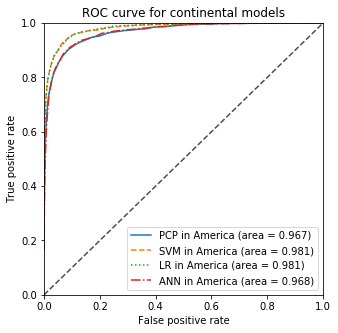

In [42]:
nn = 3
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim(0, 1)
plt.ylim(0, 1)

#Continent divide pcp
mean_auc_cont_test_pcp,all_fpr_cont_test_pcp,mean_tpr_cont_test_pcp=roc_auc(y_test, X_test,pcp_cont,classes=[0,1,2,3])
mean_auc_cont_train_pcp,all_fpr_cont_train_pcp,mean_tpr_cont_train_pcp=roc_auc(y_train, X_train,pcp_cont,classes=[0,1,2,3])
l1, = plt.plot(all_fpr_cont_test_pcp,mean_tpr_cont_test_pcp/mean_tpr_cont_test_pcp.max(), label="PCP in America (area = "+str(np.round(mean_auc_cont_test_pcp,nn))+")", linestyle="-")

#Continent divide SVM
mean_auc_cont_test_SVM,all_fpr_cont_test_SVM,mean_tpr_cont_test_SVM=roc_auc(y_test, X_test,SVM_cont,classes=[0,1,2,3])
mean_auc_cont_train_SVM,all_fpr_cont_train_SVM,mean_tpr_cont_train_SVM=roc_auc(y_train, X_train,SVM_cont,classes=[0,1,2,3])
l2, = plt.plot(all_fpr_cont_test_SVM, mean_tpr_cont_test_SVM/mean_tpr_cont_test_SVM.max(), label="SVM in America (area = "+str(np.round(mean_auc_cont_test_SVM,nn))+")", linestyle="--")

#Continent divide Logistic
mean_auc_cont_test_log,all_fpr_cont_test_log,mean_tpr_cont_test_log=roc_auc(y_test, X_test,log_cont,classes=[0,1,2,3])
mean_auc_cont_train_log,all_fpr_cont_train_log,mean_tpr_cont_train_log=roc_auc(y_train, X_train,log_cont,classes=[0,1,2,3])
l3, = plt.plot(all_fpr_cont_test_log, mean_tpr_cont_test_log/mean_tpr_cont_test_log.max(), label="LR in America (area = "+str(np.round(mean_auc_cont_test_log,nn))+")", linestyle=":")

#Continent divide ANN
mean_auc_cont_test_ANN,all_fpr_cont_test_ANN,mean_tpr_cont_test_ANN=roc_auc2(y_test, X_test,ANN_cont_55,classes=[0,1,2,3])
mean_auc_cont_train_ANN,all_fpr_cont_train_ANN,mean_tpr_cont_train_ANN=roc_auc2(y_train, X_train,ANN_cont_55,classes=[0,1,2,3])
l4, = plt.plot(all_fpr_cont_test_ANN, mean_tpr_cont_test_ANN/mean_tpr_cont_test_ANN.max(), label="ANN in America (area = "+str(np.round(mean_auc_cont_test_ANN,nn))+")", linestyle="-.")

plt.legend(handles=[l1,l2,l3,l4])
plt.title('ROC curve for continental models')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

mean_auc_cont_test_pcp, mean_auc_cont_test_SVM, mean_auc_cont_test_log, mean_auc_cont_test_ANN, mean_auc_cont_train_pcp, mean_auc_cont_train_SVM, mean_auc_cont_train_log, mean_auc_cont_train_ANN

# 1-3. Country Level ROC Curves

In [46]:
Class_am = np.unique(America_y).tolist()
Class_as = np.unique(Asia_y).tolist()
Class_eu = np.unique(EU_y).tolist()

## [1] America

In [44]:
X_train_am, X_test_am, y_train_am, y_test_am = train_test_split(America_X, America_y, test_size=0.2, random_state=0)

(2660, 5)
(10637, 5)


(0.9503910468538184,
 0.9677274498022242,
 0.96839083283252,
 0.9472792029347282,
 0.9973600065033154,
 0.9948359174364277,
 0.9954148040328432,
 0.9999998217140191)

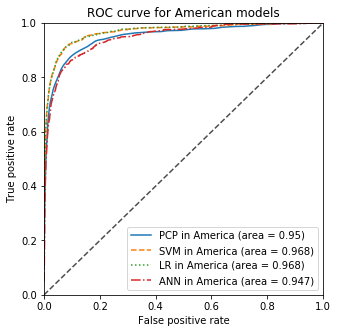

In [47]:
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim(0, 1)
plt.ylim(0, 1)

#pcp in America
mean_auc_am_test_pcp,all_fpr_am_test_pcp,mean_tpr_am_test_pcp=roc_auc(y_test_am, X_test_am,pcp_am,classes=Class_am)
mean_auc_am_train_pcp,all_fpr_am_train_pcp,mean_tpr_am_train_pcp=roc_auc(y_train_am, X_train_am,pcp_am,classes=Class_am)
l1, = plt.plot(all_fpr_am_test_pcp, mean_tpr_am_test_pcp/mean_tpr_am_test_pcp.max(), label="PCP in America (area = "+str(np.round(mean_auc_am_test_pcp,nn))+")", linestyle="-")

#SVM in America
mean_auc_am_test_SVM,all_fpr_am_test_SVM,mean_tpr_am_test_SVM=roc_auc(y_test_am, X_test_am,SVM_am,classes=Class_am)
mean_auc_am_train_SVM,all_fpr_am_train_SVM,mean_tpr_am_train_SVM=roc_auc(y_train_am, X_train_am,SVM_am,classes=Class_am)
l2, = plt.plot(all_fpr_am_test_SVM, mean_tpr_am_test_SVM/mean_tpr_am_test_SVM.max(), label="SVM in America (area = "+str(np.round(mean_auc_am_test_SVM,nn))+")", linestyle="--")

#Logistic in America
mean_auc_am_test_log,all_fpr_am_test_log,mean_tpr_am_test_log=roc_auc(y_test_am, X_test_am,log_am,classes=Class_am)
mean_auc_am_train_log,all_fpr_am_train_log,mean_tpr_am_train_log=roc_auc(y_train_am, X_train_am,log_am,classes=Class_am)
l3, = plt.plot(all_fpr_am_test_log, mean_tpr_am_test_log/mean_tpr_am_test_log.max(), label="LR in America (area = "+str(np.round(mean_auc_am_test_log,nn))+")", linestyle=":")

#Continent divide ANN
mean_auc_am_test_ANN,all_fpr_am_test_ANN,mean_tpr_am_test_ANN=roc_auc2(y_test_am, X_test_am,ANN_am_55,classes=Class_am)
mean_auc_am_train_ANN,all_fpr_am_train_ANN,mean_tpr_am_train_ANN=roc_auc2(y_train_am, X_train_am,ANN_am_55,classes=Class_am)
l4, = plt.plot(all_fpr_am_test_ANN, mean_tpr_am_test_ANN/mean_tpr_am_test_ANN.max(), label="ANN in America (area = "+str(np.round(mean_auc_am_test_ANN,nn))+")", linestyle="-.")

plt.legend(handles=[l1,l2,l3,l4])
plt.title('ROC curve for American models')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

mean_auc_am_test_pcp, mean_auc_am_test_SVM, mean_auc_am_test_log, mean_auc_am_test_ANN, mean_auc_am_train_pcp, mean_auc_am_train_SVM, mean_auc_am_train_log, mean_auc_am_train_ANN

## [2] Asia

In [48]:
X_train_as, X_test_as, y_train_as, y_test_as= train_test_split(Asia_X, Asia_y, test_size=0.2, random_state=0,shuffle=True)
Class_as, Class_eu

([0, 1, 4, 8, 9, 15, 16], [0, 4, 5, 7, 8, 14, 16])

(2210, 7)
(8838, 7)


(0.940805975422235,
 0.9571998403725165,
 0.9575546437419424,
 0.9314210043042241,
 0.9955939765210412,
 0.9921585977414464,
 0.9919847916773074,
 0.9999870557475333)

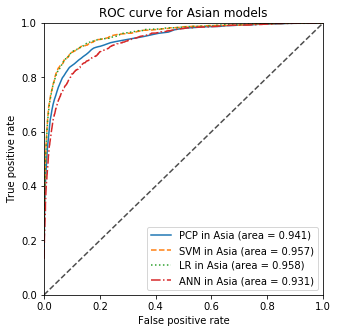

In [49]:
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim(0, 1)
plt.ylim(0, 1)

#pcp in Asia
mean_auc_as_test_pcp,all_fpr_as_test_pcp,mean_tpr_as_test_pcp=roc_auc(y_test_as, X_test_as,pcp_as,classes=Class_as)
mean_auc_as_train_pcp,all_fpr_as_train_pcp,mean_tpr_as_train_pcp=roc_auc(y_train_as, X_train_as,pcp_as,classes=Class_as)
l1, = plt.plot(all_fpr_as_test_pcp, mean_tpr_as_test_pcp/mean_tpr_as_test_pcp.max(), label="PCP in Asia (area = "+str(np.round(mean_auc_as_test_pcp,nn))+")", linestyle="-")

#SVM in Asia
mean_auc_as_test_SVM,all_fpr_as_test_SVM,mean_tpr_as_test_SVM=roc_auc(y_test_as, X_test_as,SVM_as,classes=Class_as)
mean_auc_as_train_SVM,all_fpr_as_train_SVM,mean_tpr_as_train_SVM=roc_auc(y_train_as, X_train_as,SVM_as,classes=Class_as)
l2, = plt.plot(all_fpr_as_test_SVM, mean_tpr_as_test_SVM/mean_tpr_as_test_SVM.max(), label="SVM in Asia (area = "+str(np.round(mean_auc_as_test_SVM,nn))+")", linestyle="--")

#Logistic in Asia
mean_auc_as_test_log,all_fpr_as_test_log,mean_tpr_as_test_log=roc_auc(y_test_as, X_test_as,log_as,classes=Class_as)
mean_auc_as_train_log,all_fpr_as_train_log,mean_tpr_as_train_log=roc_auc(y_train_as, X_train_as,log_as,classes=Class_as)
l3, = plt.plot(all_fpr_as_test_log, mean_tpr_as_test_log/mean_tpr_as_test_log.max(), label="LR in Asia (area = "+str(np.round(mean_auc_as_test_log,nn))+")", linestyle=":")

#ANN in Asia
mean_auc_as_test_ANN,all_fpr_as_test_ANN,mean_tpr_as_test_ANN=roc_auc2(y_test_as, X_test_as,ANN_as_55,classes=Class_as)
mean_auc_as_train_ANN,all_fpr_as_train_ANN,mean_tpr_as_train_ANN=roc_auc2(y_train_as, X_train_as, ANN_as_55,classes=Class_as)
l4, = plt.plot(all_fpr_as_test_ANN, mean_tpr_as_test_ANN/mean_tpr_as_test_ANN.max(), label="ANN in Asia (area = "+str(np.round(mean_auc_as_test_ANN,nn))+")", linestyle="-.")

plt.legend(handles=[l1,l2,l3,l4])
plt.title('ROC curve for Asian models')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

mean_auc_as_test_pcp, mean_auc_as_test_SVM, mean_auc_as_test_log, mean_auc_as_test_ANN, mean_auc_as_train_pcp, mean_auc_as_train_SVM, mean_auc_as_train_log, mean_auc_as_train_ANN

## [3] Europe

In [50]:
X_train_eu, X_test_eu, y_train_eu, y_test_eu= train_test_split(EU_X, EU_y, test_size=0.2, random_state=0,shuffle=True)

(2922, 7)
(11686, 7)


(0.9156703820723572,
 0.9404312208607174,
 0.9397023733009401,
 0.8866577292477469,
 0.9901729451372112,
 0.9862832245571145,
 0.9878621066082369,
 0.9996702036130911)

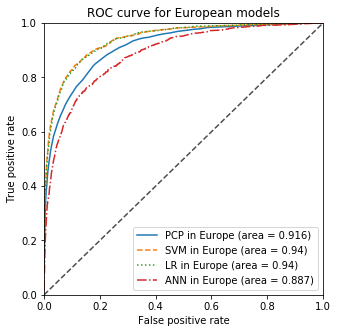

In [51]:
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], ls="--", c=".3")
plt.xlim(0, 1)
plt.ylim(0, 1)

#pcp in EU
mean_auc_eu_test_pcp,all_fpr_eu_test_pcp,mean_tpr_eu_test_pcp=roc_auc(y_test_eu, X_test_eu,pcp_eu, classes=Class_eu)
mean_auc_eu_train_pcp,all_fpr_eu_train_pcp,mean_tpr_eu_train_pcp=roc_auc(y_train_eu, X_train_eu,pcp_eu, classes=Class_eu)
l1, = plt.plot(all_fpr_eu_test_pcp, mean_tpr_eu_test_pcp/mean_tpr_eu_test_pcp.max(), label="PCP in Europe (area = "+str(np.round(mean_auc_eu_test_pcp,nn))+")", linestyle="-")

#SVM in EU
mean_auc_eu_test_SVM,all_fpr_eu_test_SVM,mean_tpr_eu_test_SVM=roc_auc(y_test_eu, X_test_eu,SVM_eu,classes=Class_eu)
mean_auc_eu_train_SVM,all_fpr_eu_train_SVM,mean_tpr_eu_train_SVM=roc_auc(y_train_eu, X_train_eu,SVM_eu,classes=Class_eu)
l2, = plt.plot(all_fpr_eu_test_SVM, mean_tpr_eu_test_SVM/mean_tpr_eu_test_SVM.max(), label="SVM in Europe (area = "+str(np.round(mean_auc_eu_test_SVM,nn))+")", linestyle="--")

#Logistic in EU
mean_auc_eu_test_log,all_fpr_eu_test_log,mean_tpr_eu_test_log=roc_auc(y_test_eu, X_test_eu,log_eu,classes=Class_eu)
mean_auc_eu_train_log,all_fpr_eu_train_log,mean_tpr_eu_train_log=roc_auc(y_train_eu, X_train_eu,log_eu,classes=Class_eu)
l3, = plt.plot(all_fpr_eu_test_log, mean_tpr_eu_test_log/mean_tpr_eu_test_log.max(), label="LR in Europe (area = "+str(np.round(mean_auc_eu_test_log,nn))+")", linestyle=":")

#ANN in EU
mean_auc_eu_test_ANN,all_fpr_eu_test_ANN,mean_tpr_eu_test_ANN=roc_auc2(y_test_eu, X_test_eu,ANN_eu_55,classes=Class_eu)
mean_auc_eu_train_ANN,all_fpr_eu_train_ANN,mean_tpr_eu_train_ANN=roc_auc2(y_train_eu, X_train_eu,ANN_eu_55,classes=Class_eu)
l4, = plt.plot(all_fpr_eu_test_ANN, mean_tpr_eu_test_ANN/mean_tpr_eu_test_ANN.max(), label="ANN in Europe (area = "+str(np.round(mean_auc_eu_test_ANN,nn))+")", linestyle="-.")

plt.legend(handles=[l1,l2,l3,l4])
plt.title('ROC curve for European models')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

mean_auc_eu_test_pcp, mean_auc_eu_test_SVM, mean_auc_eu_test_log, mean_auc_eu_test_ANN, mean_auc_eu_train_pcp, mean_auc_eu_train_SVM, mean_auc_eu_train_log, mean_auc_eu_train_ANN

In [52]:
#Import Data again for different names
svm_classif = pickle.load(open('SVM_cont_new','rb'))
clf = pickle.load(open('log_cont_new','rb'))
pcp_cont = pickle.load(open('pcp_cont_new','rb'))
svm_classif_am = pickle.load(open('SVM_am_new','rb'))
clf_lr_am = pickle.load(open('log_am_new','rb'))
pcp_am = pickle.load(open('pcp_am_new','rb'))
svm_classif_as = pickle.load(open('SVM_as_new','rb'))
clf_lr_as = pickle.load(open('log_as_new','rb'))
pcp_as = pickle.load(open('pcp_as_new','rb'))
clf_lr_eu = pickle.load(open('log_eu_new','rb'))
pcp_eu = pickle.load(open('pcp_eu_new','rb'))
svm_classif_eu = pickle.load(open('SVM_eu_new', 'rb'))

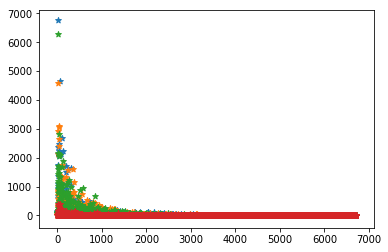

In [53]:
x_l=np.arange(6714)
plt.scatter(x_l,EU_X.sum(axis=0),marker='*')
plt.scatter(x_l,Asia_X.sum(axis=0),marker='*')
plt.scatter(x_l,America_X.sum(axis=0),marker='*')
plt.scatter(x_l,Africa_X.sum(axis=0),marker='*')

# Step 4. Data Analysis

## 1. Does the Best Model in Continent Level + Best Model in Country Level lead to Best Model overall?

In [54]:
def OCLF(X_test,model_cont,model_am,model_as,model_eu,Adjustments,y_test3):

    y_cont_pred_all3=model_cont.predict(X_test)
    am_ind=np.where(y_cont_pred_all3==0)[0]
    eu_ind=np.where(y_cont_pred_all3==2)[0]
    as_ind=np.where(y_cont_pred_all3==1)[0]
    af_ind=np.where(y_cont_pred_all3==3)[0]

    am_test_pred3=model_am.predict(X_test[am_ind,:])+Adjustments[0]
    as_test_pred3=model_as.predict(X_test[as_ind,:])+Adjustments[1]
    eu_test_pred3=model_eu.predict(X_test[eu_ind,:])+Adjustments[2]
    af_test_pred3=np.ones(len(af_ind))*Adjustments[3]
    y_overall_pred3=np.empty((len(y_test)))
    y_overall_pred3[am_ind]=am_test_pred3
    y_overall_pred3[as_ind]=as_test_pred3
    y_overall_pred3[eu_ind]=eu_test_pred3
    y_overall_pred3[af_ind]=af_test_pred3
    accuracy_test_overall3= np.sum(y_overall_pred3 ==y_test3 ) / len(y_test3)
    return accuracy_test_overall3
def OCLF1(X_test,model_cont,model_am,model_as,model_eu,Adjustments,y_test3):

    y_cont_pred_all3=model_cont.predict(X_test)
    am_ind=np.where(y_cont_pred_all3==0)[0]
    eu_ind=np.where(y_cont_pred_all3==2)[0]
    as_ind=np.where(y_cont_pred_all3==1)[0]
    af_ind=np.where(y_cont_pred_all3==3)[0]

    am_test_pred3=model_am.predict(X_test[am_ind,:])+Adjustments[0]
    as_test_pred3=model_as.predict(X_test[as_ind,:])+Adjustments[1]
    eu_test_pred3=model_eu.predict(X_test[eu_ind,:])+Adjustments[2]
    af_test_pred3=np.ones(len(af_ind))*Adjustments[3]
    y_overall_pred3=np.empty((len(y_test)))
    y_overall_pred3[am_ind]=am_test_pred3
    y_overall_pred3[as_ind]=as_test_pred3
    y_overall_pred3[eu_ind]=eu_test_pred3
    y_overall_pred3[af_ind]=af_test_pred3
    accuracy_test_overall3= np.sum(y_overall_pred3 ==y_test3 ) / len(y_test3)
    return y_overall_pred3

In [55]:
ac=np.empty((16))

ac[0]=OCLF(X_test,clf,svm_classif_am,svm_classif_as,svm_classif_eu,Adjustments,y_test3)
ac[1]=OCLF(X_test,clf,clf_lr_am,clf_lr_as,clf_lr_eu,Adjustments,y_test3)

ac[2]=OCLF(X_test,clf,clf_lr_am,clf_lr_as,svm_classif_eu,Adjustments,y_test3)
ac[3]=OCLF(X_test,clf,clf_lr_am,svm_classif_as,clf_lr_eu,Adjustments,y_test3)
ac[4]=OCLF(X_test,clf,svm_classif_am,clf_lr_as,clf_lr_eu,Adjustments,y_test3)

ac[5]=OCLF(X_test,clf,clf_lr_am,svm_classif_as,svm_classif_eu,Adjustments,y_test3)
ac[6]=OCLF(X_test,clf,svm_classif_am,svm_classif_as,clf_lr_eu,Adjustments,y_test3)
ac[7]=OCLF(X_test,clf,svm_classif_am,svm_classif_as,svm_classif_eu,Adjustments,y_test3)


ac[8]=OCLF(X_test,svm_classif,svm_classif_am,svm_classif_as,svm_classif_eu,Adjustments,y_test3)
ac[9]=OCLF(X_test,svm_classif,clf_lr_am,svm_classif_as,svm_classif_eu,Adjustments,y_test3)
ac[10]=OCLF(X_test,svm_classif,svm_classif_am,clf_lr_as,svm_classif_eu,Adjustments,y_test3)
ac[11]=OCLF(X_test,svm_classif,svm_classif_am,svm_classif_as,clf_lr_eu,Adjustments,y_test3)

ac[12]=OCLF(X_test,svm_classif,clf_lr_am,clf_lr_as,svm_classif_eu,Adjustments,y_test3)
ac[13]=OCLF(X_test,svm_classif,clf_lr_am,svm_classif_as,clf_lr_eu,Adjustments,y_test3)
ac[14]=OCLF(X_test,svm_classif,svm_classif_am,clf_lr_as,clf_lr_eu,Adjustments,y_test3)


ac[15]=OCLF(X_test,svm_classif,clf_lr_am,clf_lr_as,clf_lr_eu,Adjustments,y_test3)

#all_ac=[ac1,ac2,ac3,ac4]

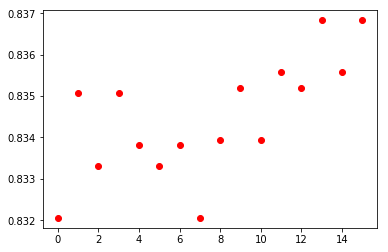

In [56]:
plt.plot(ac,'ro')

In [57]:
y_test_overall=OCLF1(X_test,svm_classif,clf_lr_am,svm_classif_as,clf_lr_eu,Adjustments,y_test3)
#print(y_test_overall.shape, y_test3.shape)

cm = confusion_matrix(y_test3, y_test_overall)

accuracy_test_overall = np.sum(y_test3 == y_test_overall) / len(y_test_overall)

print(accuracy_test_overall)

0.8368321810182275


In [58]:
unique_labels2=America+Asia+EU+Africa

In [59]:
print(unique_labels2)

['cajun_creole', 'southern_us', 'jamaican', 'mexican', 'brazilian', 'chinese', 'filipino', 'thai', 'vietnamese', 'japanese', 'korean', 'indian', 'french', 'greek', 'italian', 'russian', 'spanish', 'irish', 'british', 'moroccan']


## 2. Make the Confusion Matrix for the Entire DataSet

In [60]:
def plot_confusion_matrix_YK(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt_cm.cm.Blues):#,
                          #savename):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100
        #cm = cm.astype('float') / cm.sum(axis=1)*100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt_cm.figure(figsize=(12,12))
    plt_cm.rcParams.update({'font.size': 11})

    im = plt_cm.imshow(cm, interpolation='nearest', cmap=cmap)
    plt_cm.title(title)
    plt_cm.colorbar(im, shrink=0.7)#extend='min'
    tick_marks = np.arange(len(classes))
    plt_cm.xticks(tick_marks, classes, rotation=90)
    plt_cm.yticks(tick_marks, classes, rotation=0)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt_cm.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt_cm.tight_layout()
    plt_cm.ylabel('True label')
    plt_cm.xlabel('Predicted label')
    #plt_cm.savefig(savename,dpi=900)

In [61]:
neworder=[]
for i in unique_labels:
    neworder.append(unique_labels2.index(i))

In [62]:
print(neworder)

[4, 18, 0, 5, 6, 12, 13, 11, 17, 14, 2, 9, 10, 3, 19, 15, 1, 16, 7, 8]


In [63]:
cm1=cm/cm.sum(axis=1)[:, np.newaxis]
cm2=np.empty((20,20))
cm3=np.empty((20,20))
for i in range(20):
    for j in range(20):
        cm2[neworder[i],neworder[j]]=cm1[i,j]
        cm3[neworder[i],neworder[j]]=cm[i,j]

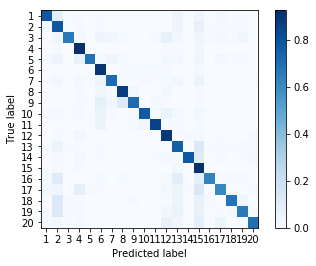

In [64]:
fig, ax = plt.subplots()
im = ax.imshow(cm2, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm2.shape[1]),
       yticks=np.arange(cm2.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=np.arange(1,21), yticklabels=np.arange(1,21),
       ylabel='True label',
       xlabel='Predicted label')
fig.savefig('Confusionmatrix.png',dpi=900)

In [36]:
print(cm2.sum(1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Normalized confusion matrix


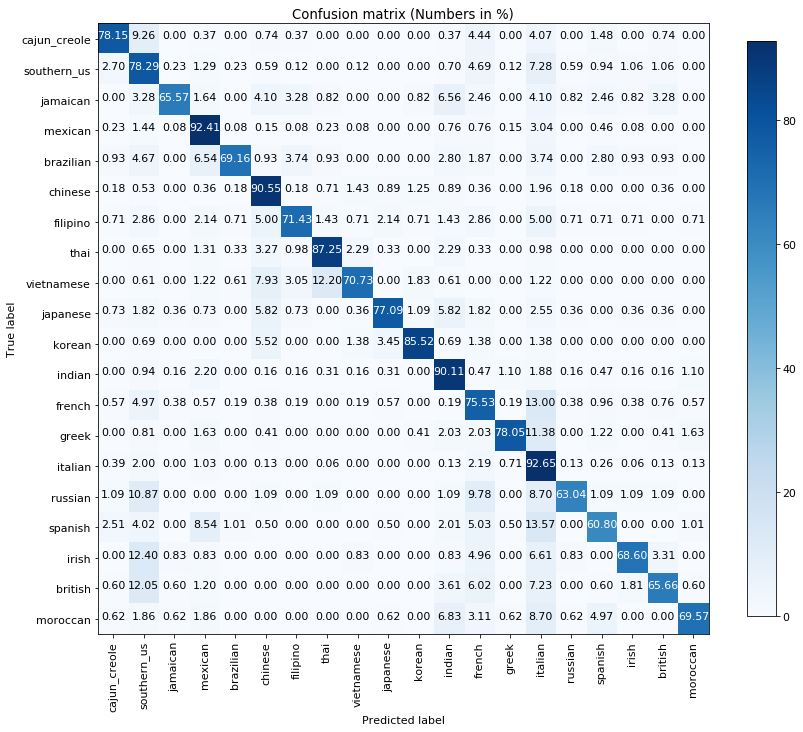

In [161]:
#ac, ac_avg = all_result(y_test_overall, y_test3, unique_labels2, normalize = True, title='Confusion matrix')
plot_confusion_matrix_YK(cm3, unique_labels2,
                          normalize=True,
                          title='Confusion matrix (Numbers in %)',
                          cmap=plt_cm.cm.Blues) 
                          #savename='OverallConfusionmatrix.png')

Normalized confusion matrix


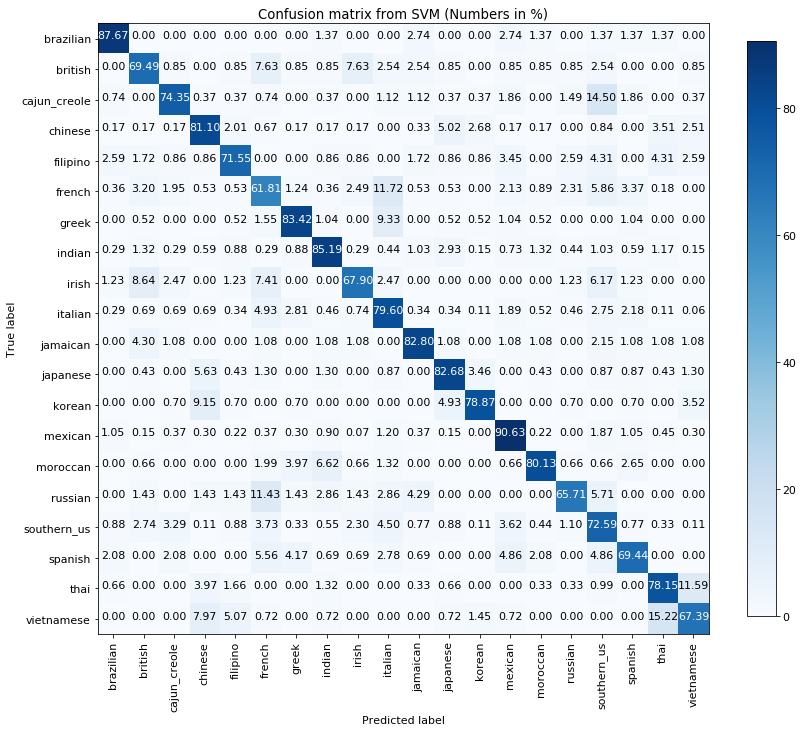

In [71]:
svm_classif = pickle.load(open('SVM_all_new', 'rb'))
#ac, ac_avg = all_result(y_test_overall, y_test3, unique_labels2, normalize = True, title='Confusion matrix')
plot_confusion_matrix_YK(cm_svm_all, unique_labels,
                          normalize=True,
                          title='Confusion matrix from SVM (Numbers in %)',
                          cmap=plt_cm.cm.Blues) 
                          #savename='OverallConfusionmatrix.png')

Normalized confusion matrix


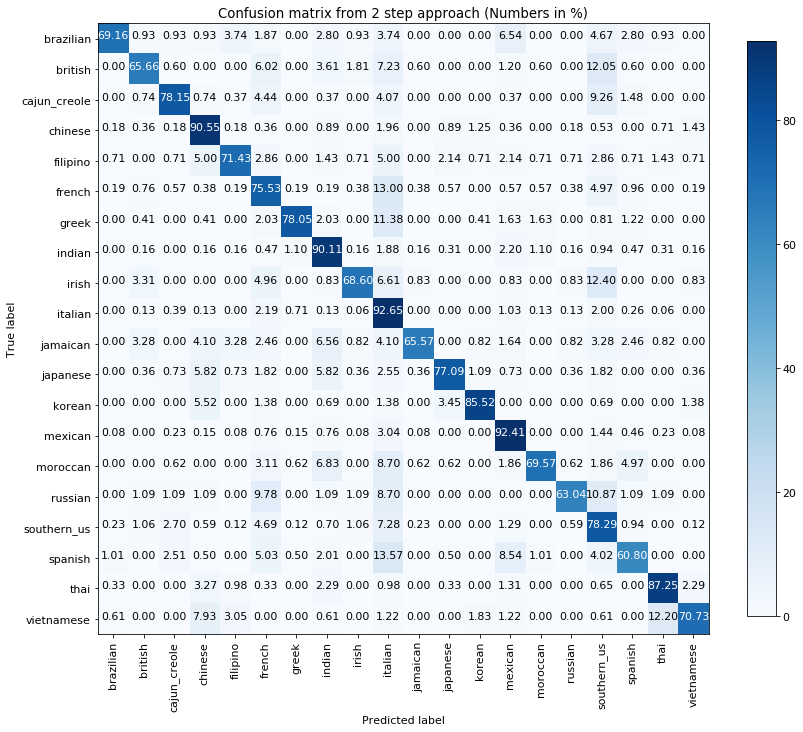

In [163]:
plot_confusion_matrix_YK(cm1, unique_labels,
                          normalize=True,
                          title='Confusion matrix from 2 step approach (Numbers in %)',
                          cmap=plt_cm.cm.Blues) 

In [72]:
print('\tOverall accuracy for the testing set')
print('\tAccuracy with SVM            :', accuracy_test_svm_all)
print('\tAccuracy with 2-step appraoch:', accuracy_test_overall)

	Overall accuracy for the testing set
	Accuracy with SVM            : 0.7913262099308611
	Accuracy with 2-step appraoch: 0.8368321810182275


# Step 5. Discussion

## 1. Interpretation of the Confusion Matrix and derive the meaning of the data to the culturual relationship

<img src="https://github.com/Youngjo-Kim/Geographic-Classification-of-Cuisine-Recipes/blob/master/figures/OverallConfusionMatrix.png?raw=true">

In the American section, 9.3% of Cajun & Creole foods are predicted as Southern US foods because they are very close to each in the US. More than 8% of each Cajun Creole foods and Southern US foods are predicted as French or Italian foods since many people have come from Europe to America for a long time. With the same manner, we think it is probably available that many French, Russian, Irish, or British foods are predicted as Southern US foods. In addition, the region of Cajun & Creole foods is Louisiana where was a colony of France, so that the 4.44% of Cajun & Creole foods are predicted as French foods.

In the Asian section, we can see many countries' foods are related to Chinese foods. It is very possible because China has been influential to most countries for several thousand years. Vietnamese foods and Thai foods may be influential each because they are very close in geographically. Wrong predicted Filipino foods have a larger ratio of western foods because the Philippines was colonized by Spain and America. One thing which does not follow our assumption is that we cannot find any relationships between Vietnamese and French foods even though Vietnam was colonized by France for several decades.

Many foods from European countries are predicted as Italian and French foods. Because European countries have influenced each other for thousands of years, we guess it is not easy to distinguish European foods perfectly. However, we think the reason that many wrongly predicted results as Italian or French foods may be caused by the number of samples. Italian category has the most number of samples and the French category has the second largest number of samples. In addition, 3.6% of British foods were predicted as Indian foods. Because many Indian people have been moved to England, so this prediction can be explained.

Unfortunately, we have only one country, Moroccan, for African data set. This country is located in the Northern part of Africa where is very close to Europe. Therefore, we can accept the wrong results that some Moroccan foods were predicted as European foods. However, one thing we cannot understand is wrong predicted results as Indian foods. We tried to figure out the relationship between Morocco and India in history, it is not easy to find.

## Interactive Data Visualization for Confusion Matrix

In [73]:
asdf = pd.DataFrame(data = cm2.transpose(),index=unique_labels2,columns=unique_labels2)#,columns=unique_labels2)#index=unique_labels2

In [74]:
from math import pi
import pandas as pd
import numpy as np
from bokeh.io import show
from bokeh.models import LinearColorMapper, BasicTicker, PrintfTickFormatter, ColorBar
from bokeh.plotting import figure
from bokeh.sampledata.unemployment1948 import data
from bokeh.palettes import Viridis256
from bokeh.palettes import grey
from bokeh.palettes import Blues

asdf = pd.DataFrame(data = cm2.transpose()*100,index=unique_labels2,columns=unique_labels2)#,columns=unique_labels2)#index=unique_labels2
df = asdf
idx = 0
new_col = ['cajun_creole', 'southern_us', 'jamaican', 'mexican', 'brazilian', 'chinese', 'filipino', 'thai', 'vietnamese', 'japanese', 'korean', 'indian', 'french', 'greek', 'italian', 'russian', 'spanish', 'irish', 'british', 'moroccan']
df.insert(loc=idx, column='Country', value=new_col)

df = df.set_index('Country')
df.columns.name = 'Matrix'

Countries = list(df.index)
Matrices = list(df.columns)

df = pd.DataFrame(df.stack(), columns=['values']).reset_index()

colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
colors = ['#f7fbff','#deebf7','#c6dbef','#9ecae1','#6baed6','#4292c6','#2171b5','#08519c','#08306b','#030042']
#cmaps = ('Sequential',['Blues'])
mapper = LinearColorMapper(palette=colors, low=0, high=20)
#mapper = LinearColorMapper(palette=Blues(10), low=0, high=20)
#mapper = LinearColorMapper(palette=cmaps, low=0, high=100)


#TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"
TOOLS = "hover"

p = figure(title="Confusion matrix from 2 step approach (Numbers in %)".format(Countries[0], Countries[-1]),
           x_range=Countries, y_range=list(reversed(Matrices)),
           x_axis_location="below", plot_width=800, plot_height=800,
           tools=TOOLS, toolbar_location='below',
           tooltips=[('Label', 'Predicted: @Country, Actual: @Matrix'), ('Rate (%)', '@values%')])
p.xaxis.axis_label = 'Predicted label'
p.yaxis.axis_label = 'Actual label'

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "12pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Country", y="Matrix", width=1, height=1,
       source=df,
       fill_color={'field': 'values', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="10pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

show(p)      # show the plot
output_file("ConfusionMatrix.html")
save(p)

'C:\\Users\\User\\Documents\\CX4240\\CRproject\\project\\ConfusionMatrix.html'

## 2. Data Reduction using Multiple Correspondence Analysis (MCA) is on the different file named: project_jk.ipynb

## 3. Accuracy Compare

In [75]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.io import output_file, show
from bokeh.models.widgets import RadioButtonGroup, RadioGroup
from bokeh.layouts import widgetbox, gridplot
from bokeh.models.widgets import CheckboxGroup
from bokeh.io import export_png


In [76]:
fruits = ['Testing Accuracy', 'Training Accuracy', 'AUC']
years = ['Perceptron', 'SVM', 'ANN', 'Logistic Regression']

data_cont = {'fruits' : fruits,
        'Perceptron'   : [0.88297, 0.95154, 0.96743],
        'SVM'   : [0.90723, 0.94274, 0.98073],
        'ANN'   : [0.87203, 0.98193, 0.9676],
        'Logistic Regression': [0.90547, 0.94654, 0.98083]}

data_am = {'fruits' : fruits,
        'Perceptron'   : [0.85977, 0.97546, 0.95039],
        'SVM'   : [0.88233, 0.95121, 0.96773],
        'ANN'   : [0.83571, 0.99972, 0.94728],
        'Logistic Regression': [0.88233, 0.95694, 0.96839]}

data_as = {'fruits' : fruits,
        'Perceptron'   : [0.78462, 0.95666, 0.94081],
        'SVM'   : [0.82534, 0.92883, 0.9572],
        'ANN'   : [0.73077, 0.99932, 0.93142],
        'Logistic Regression': [0.82081, 0.93143, 0.95755]}

data_eu = {'fruits' : fruits,
        'Perceptron'   : [0.73546, 0.92769, 0.91567],
        'SVM'   : [0.78029, 0.89534, 0.94043],
        'ANN'   : [0.68583, 0.98639, 0.88666],
        'Logistic Regression': [0.77413, 0.90519, 0.9397]}



In [77]:

data = data_cont


palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['Perceptron'], data['SVM'], data['ANN'], data['Logistic Regression']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_accuracy_cont = figure(x_range=FactorRange(*x), plot_height=350, title="Classify the recipe to each continent",
    toolbar_location=None, tools="")

p_accuracy_cont.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
    fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p_accuracy_cont.y_range.start = 0.7
p_accuracy_cont.y_range.end = 1
p_accuracy_cont.x_range.range_padding = 0.1
p_accuracy_cont.xaxis.major_label_orientation = 1
p_accuracy_cont.xgrid.grid_line_color = None

C:\Users\User\Anaconda3\lib\site-packages\bokeh\models\mappers.py:139: UserWarning: Palette length does not match number of factors. ['Logistic Regression'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [78]:


data = data_am


palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['Perceptron'], data['SVM'], data['ANN'], data['Logistic Regression']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_accuracy_am = figure(x_range=FactorRange(*x), plot_height=350, title="Classify the recipe to each country (America)",
    toolbar_location=None, tools="")

p_accuracy_am.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
    fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p_accuracy_am.y_range.start = 0.7
p_accuracy_am.y_range.end = 1
p_accuracy_am.x_range.range_padding = 0.1
p_accuracy_am.xaxis.major_label_orientation = 1
p_accuracy_am.xgrid.grid_line_color = None

In [79]:
data = data_as


palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['Perceptron'], data['SVM'], data['ANN'], data['Logistic Regression']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_accuracy_as = figure(x_range=FactorRange(*x), plot_height=350, title="Classify the recipe to each country (Asia)",
    toolbar_location=None, tools="")

p_accuracy_as.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
    fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p_accuracy_as.y_range.start = 0.7
p_accuracy_as.y_range.end = 1
p_accuracy_as.x_range.range_padding = 0.1
p_accuracy_as.xaxis.major_label_orientation = 1
p_accuracy_as.xgrid.grid_line_color = None

In [80]:
data = data_eu


palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['Perceptron'], data['SVM'], data['ANN'], data['Logistic Regression']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_accuracy_eu = figure(x_range=FactorRange(*x), plot_height=350, title="Classify the recipe to each country (Europe)",
    toolbar_location=None, tools="")

p_accuracy_eu.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
    fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p_accuracy_eu.y_range.start = 0.7
p_accuracy_eu.y_range.end = 1
p_accuracy_eu.x_range.range_padding = 0.1
p_accuracy_eu.xaxis.major_label_orientation = 1
p_accuracy_eu.xgrid.grid_line_color = None



In [81]:

grid2=gridplot([p_accuracy_cont, p_accuracy_am], ncols=2, plot_width=450, plot_height=450)
grid3=gridplot([p_accuracy_as, p_accuracy_eu], ncols=2, plot_width=450, plot_height=450) 

In [ ]:
export_png(grid2, filename="Accuracycompare1.png")
export_png(grid3, filename="Accuracycompare2.png")

In [84]:
data_cont_ = {'fruits' : fruits,
        'Logistic Regression': [0.90547, 0.94654, 0.98083],
        'Logistic Regression (Weight balanced)': [0.90547, 0.94654, 0.98083]}

In [86]:

fruits = ['Testing Accuracy', 'Training Accuracy']
years = ['Logistic Regression', 'Logistic Regression (Weight balanced)']

data_cont_ = {'fruits' : fruits,
        'Logistic Regression': [0.90547, 0.94654],
        'Logistic Regression (Weight balanced)': [0.89881, 0.94748]}

data = data_cont_


palette = ["#c9d9d3", "#718dbf", "#e84d60"]

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['Logistic Regression'], data['Logistic Regression (Weight balanced)']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p_accuracy_cont2 = figure(x_range=FactorRange(*x), plot_height=350, title="Classify the recipe to each continent",
    toolbar_location=None, tools="")

p_accuracy_cont2.vbar(x='x', top='counts', width=0.7, source=source, line_color="white",
    fill_color=factor_cmap('x', palette=palette, factors=years, start=1, end=2))

p_accuracy_cont2.y_range.start = 0.88
p_accuracy_cont2.y_range.end = 0.95
p_accuracy_cont2.x_range.range_padding = 0.1
p_accuracy_cont2.xaxis.major_label_orientation = 1
p_accuracy_cont2.xgrid.grid_line_color = None

show(p_accuracy_cont2)
export_png(p_accuracy_cont2, filename="Logistic(Weight_balanced_compare).png")

# References

__Data Source:__ <br>

https://www.kaggle.com/kaggle/recipe-ingredients-dataset#test.json

__Publication:__<br>
1. Kotsiantis SB. Supervised Machine Learning: A Review of Classification Techniques. Proceedings of the 2007 conference on Emerging Artificial Intelligence Applications in Computer Engineering: Real Word AI Systems with Applications in eHealth, HCI, Information Retrieval and Pervasive Technologies; 2007.
2. Vapnik V, Kotz S. Estimation of Dependences Based on Empirical Data. Springer; 2006.
3. Vapnik V. The Nature of Statistical Learning Theory. Springer New York; 1999.
4. Jonathon Shlens. A Tutorial on Principal Component Analysis. arXiv:1404.1100v1; 2014.
5. Herve Abdi & Dominique Valentin. Multiple Correspondence Analysis; 2007.
6. Howard Bergman et al. Correspondence analysis is a useful tool to uncover the relationships among categorical variables; 2010.

__Others:__
<br>https://www.researchgate.net/post/Machine_learning_if_proportion_of_number_of_cases_in_different_class_in_training_set_matters
https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html
<br>http://www.bigendiandata.com/2017-06-27-Mapping_in_Jupyter/
<br>https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
<br>https://bokeh.pydata.org/en/latest/docs/gallery/unemployment.html
<br>www.freeworldmaps.net
